#  训练神经网络 -- 使用微分求导

### 导入鸢尾花数据集

In [28]:
import sys, os
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.model_selection  import train_test_split

iris = datasets.load_iris()

In [29]:
X = iris.data
y = iris.target

print('输入数据维度     ： ',   X.shape)
print('标记数据维度     ： ',y.shape)
print('y中不同标记的元素 ： ', np.unique(y))
print('y中不同标记的数量 ： ', len(np.unique(y)))


输入数据维度     ：  (150, 4)
标记数据维度     ：  (150,)
y中不同标记的元素 ：  [0 1 2]
y中不同标记的数量 ：  3


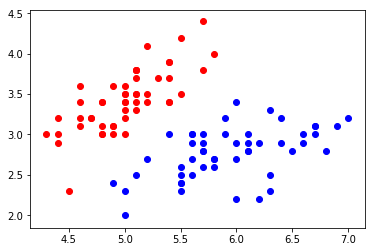

In [31]:
# 打印图像
plt.scatter(X[y==0,0], X[y==0,1], color="red")
plt.scatter(X[y==1,0], X[y==1,1], color="blue")
plt.show()

In [4]:
# 对数据进行分割， 分成测试和训练数据 
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=666)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(112, 4)
(112,)
(38, 4)
(38,)


### 损失函数

神经网络的学习中所用的指标称为 **损失函数** 。
一般用均方误差和交叉熵误差。




####  均方误差公式
  ${1/2}\sum_{i=0}^{n}{(y_i-t_i)}^2$

In [5]:
def mean_squared_error(y, t):
    return 0.5 * np.sum((y-t) ** 2)

# 2 为正确解
t = [0, 0, 1, 0, 0,0, 0, 0, 0, 0]

# 2 的概率最高
y = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]
e1 = mean_squared_error(np.array(y), np.array(t))

# 7 的概率最高
y = [0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0]
e2 = mean_squared_error(np.array(y), np.array(t))

print(e1)
print(e2)


0.09750000000000003
0.5975



#### 交叉熵误差公式
  -$\sum_{i=0}^{n}{t_i log y_i}$  
  
  
因为t 只有一个标签为1， 剩余都为0， 所以交叉熵误差的值是由正确解标签所对应的输出结果决定的。 

In [6]:
def cross_entropy_error(y, t):
    delta = 1e-7
    return -np.sum(t * np.log(y + delta))



# 2 为正确解
t = [0, 0, 1, 0, 0,0, 0, 0, 0, 0]

# 2 的概率最高
y = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]
e1 = cross_entropy_error(np.array(y), np.array(t))

# 7 的概率最高
y = [0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0]
e2 = cross_entropy_error(np.array(y), np.array(t))

print(e1)
print(e2)



0.510825457099338
2.302584092994546


###  批量学习

随机选择一组数据进行训练

In [7]:
train_size = X_train.shape[0]
batch_size = 10
batch_mask = np.random.choice(train_size, batch_size)
x_batch = X_train[batch_mask]
y_batch = y_train[batch_mask]
print('batch_mask: ', batch_mask)
print('x_batch: ', x_batch)
print('y_batch: ', y_batch)

batch_mask:  [ 84  10   5 107  53  57  93  51  57  17]
x_batch:  [[5.6 2.9 3.6 1.3]
 [5.8 2.7 3.9 1.2]
 [5.2 2.7 3.9 1.4]
 [6.4 3.2 4.5 1.5]
 [6.1 2.8 4.  1.3]
 [5.6 3.  4.1 1.3]
 [7.7 2.8 6.7 2. ]
 [5.4 3.  4.5 1.5]
 [5.6 3.  4.1 1.3]
 [4.7 3.2 1.6 0.2]]
y_batch:  [1 1 1 1 1 1 2 1 1 0]


In [8]:
# 交叉熵函数也进行改进
def cross_entropy_error(y, t):
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)
        
    # 监督数据是one-hot-vector的情况下，转换为正确解标签的索引
    if t.size == y.size:
        t = t.argmax(axis=1)
             
    batch_size = y.shape[0]
    return -np.sum(np.log(y[np.arange(batch_size), t] + 1e-7)) / batch_size

### 利用微分求导数 (拉格朗日中值定理)
![image](https://github.com/dikers/machine-learn/blob/master/deep-learning/image/008.png?raw=true)

In [9]:
def numerical_diff(f, x):
    h = 1e-4 # 0.0001
    return (f(x+h) - f(x-h))/ (2*h)

$y = 0.01 x^2 + 0.1 x$

求这个函数在某一个点的导数

In [10]:
def function_1(x):
    return 0.01 * x**2 + 0.1 *x
 

x = np.arange(0.0, 20.0, 0.1)
y = function_1(x)



x=5  导数：  0.1999999999990898
x=10 导数：  0.2999999999986347


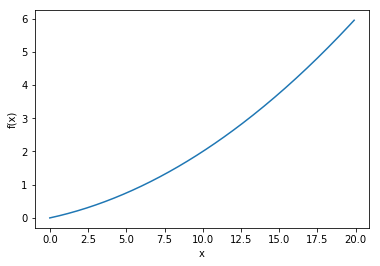

In [11]:
# 求在 x=5  x=10 出的导数
print('x=5  导数： ', numerical_diff(function_1, 5))
print('x=10 导数： ', numerical_diff(function_1, 10))

plt.xlabel("x")
plt.ylabel("f(x)")

plt.plot(x, y)
plt.show()




### 偏导数

求下面函数的偏导数

$f(x_0,x_1) = x_0^2 + x_1^2 $

In [12]:
def function_2(x):
    return x[0]**2 + x[1]** 2
    # return np.sum(x**2)

$x_0 =3, x_1= 4$, 求$x_0$ 的偏导数

In [13]:
def function_tmp1(x0):
    return x0*x0 + 4.0 **2.0

numerical_diff(function_tmp1, 3.0)

6.00000000000378

$x_0 =3, x_1= 4$, 求$x_1$ 的偏导数

In [14]:
def function_tmp2(x1):
    return 3.0**2.0  + x1*x1

numerical_diff(function_tmp2, 4.0)

7.999999999999119

###  求梯度 


In [15]:
def numerical_gradient(f, x):
    h = 1e-4 # 0.0001
    grad = np.zeros_like(x)
    
    for idx in range(x.size):
        tmp_val = x[idx]
        x[idx] = float(tmp_val) + h
        fxh1 = f(x) # f(x+h)
        
        x[idx] = tmp_val - h 
        fxh2 = f(x) # f(x-h)
        grad[idx] = (fxh1 - fxh2) / (2*h)
        
        x[idx] = tmp_val # 还原值
        
    return grad

print(numerical_gradient(function_2, np.array([3.0, 4.0])))
print(numerical_gradient(function_2, np.array([0.0, 2.0])))
print(numerical_gradient(function_2, np.array([3.0, 0.0])))


[6. 8.]
[0. 4.]
[6. 0.]


### 用梯度下降法求最小值


$f(x_0,x_1) = x_0^2 + x_1^2 $

In [16]:
def gradient_descent(f, init_x, lr=0.01, step_num=100):
    x = init_x
    x_history = []

    for i in range(step_num):
        x_history.append( x.copy() )

        grad = numerical_gradient(f, x)
        x -= lr * grad

    return x, np.array(x_history)

[2.85449539e-05 2.85449539e-05]


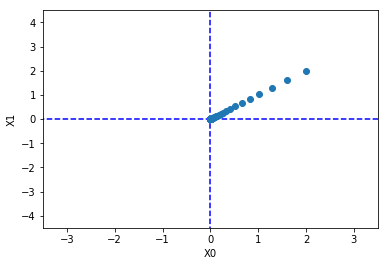

In [17]:
init_x = np.array([2.0, 2.0])
x, x_history =gradient_descent(function_2, init_x= init_x, lr=0.1, step_num=50)
print(x)

plt.plot( [-5, 5], [0,0], '--b')
plt.plot( [0,0], [-5, 5], '--b')
plt.plot(x_history[:,0], x_history[:,1], 'o')

plt.xlim(-3.5, 3.5)
plt.ylim(-4.5, 4.5)
plt.xlabel("X0")
plt.ylabel("X1")
plt.show()

In [18]:
# 用于分类的激活函数
def softmax(x):
    if x.ndim == 2:
        x = x.T
        x = x - np.max(x, axis=0)
        y = np.exp(x) / np.sum(np.exp(x), axis=0)
        return y.T 

    x = x - np.max(x) # 溢出对策
    return np.exp(x) / np.sum(np.exp(x))

In [19]:
def _numerical_gradient_no_batch(f, x):
    h = 1e-4 # 0.0001
    grad = np.zeros_like(x)
    
    for idx in range(x.size):
        tmp_val = x[idx]
        x[idx] = float(tmp_val) + h
        fxh1 = f(x) # f(x+h)
        
        x[idx] = tmp_val - h 
        fxh2 = f(x) # f(x-h)
        grad[idx] = (fxh1 - fxh2) / (2*h)
        x[idx] = tmp_val # 还原值
        
    return grad


def numerical_gradient(f, X):
    if X.ndim == 1:
        return _numerical_gradient_no_batch(f, X)
    else:
        grad = np.zeros_like(X)
        
        for idx, x in enumerate(X):
            grad[idx] = _numerical_gradient_no_batch(f, x)
        
        return grad

### 简单的神经网络求梯度

In [20]:
class simpleNet:
    def __init__(self):
        self.W = np.random.randn(2,3)

    def predict(self, x):
        return np.dot(x, self.W)

    def loss(self, x, t):
        z = self.predict(x)
        y = softmax(z)
        loss = cross_entropy_error(y, t)
        return loss

# 给定一组数据， 求W的导数， 损失函数是通过W 进行表示的， 把x 的值代入， 通过 W 的微分进行计算。 
x = np.array([0.6, 0.9])
t = np.array([0, 0, 1])

net = simpleNet()
print(net.W)

f = lambda w: net.loss(x, t)
dW = numerical_gradient(f, net.W)

print(dW)

[[ 0.31785127 -0.59404188 -1.70465055]
 [-0.17849952  0.84632056 -1.09401973]]
[[ 0.23205006  0.33769912 -0.56974918]
 [ 0.34807509  0.50654868 -0.85462377]]


In [21]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_grad(x):
    return (1.0 - sigmoid(x)) * sigmoid(x)

In [22]:



class TwoLayerNet:

    def __init__(self, input_size, hidden_size, output_size, weight_init_std=0.01):
        # 初始化权重
        self.params = {}
        self.params['W1'] = weight_init_std * np.random.randn(input_size, hidden_size)
        self.params['b1'] = np.zeros(hidden_size)
        self.params['W2'] = weight_init_std * np.random.randn(hidden_size, output_size)
        self.params['b2'] = np.zeros(output_size)

    def predict(self, x):
        W1, W2 = self.params['W1'], self.params['W2']
        b1, b2 = self.params['b1'], self.params['b2']
    
        a1 = np.dot(x, W1) + b1
        z1 = sigmoid(a1)
        a2 = np.dot(z1, W2) + b2
        y = softmax(a2)
        
        return y
        
    # x:输入数据, t:监督数据
    def loss(self, x, t):
        y = self.predict(x)
        
        return cross_entropy_error(y, t)
    
    def accuracy(self, x, t):
        y = self.predict(x)
        y = np.argmax(y, axis=0)
        t = np.argmax(t, axis=0)
        
        accuracy = np.sum(y == t) / float(x.shape[0])
        return accuracy
        
    # x:输入数据, t:监督数据
    def numerical_gradient(self, x, t):
        loss_W = lambda W: self.loss(x, t)
        
        grads = {}
        grads['W1'] = numerical_gradient(loss_W, self.params['W1'])
        grads['b1'] = numerical_gradient(loss_W, self.params['b1'])
        grads['W2'] = numerical_gradient(loss_W, self.params['W2'])
        grads['b2'] = numerical_gradient(loss_W, self.params['b2'])
        
        return grads
        
    def gradient(self, x, t):
        W1, W2 = self.params['W1'], self.params['W2']
        b1, b2 = self.params['b1'], self.params['b2']
        grads = {}
        
        batch_num = x.shape[0]
        
        # forward
        a1 = np.dot(x, W1) + b1
        z1 = sigmoid(a1)
        a2 = np.dot(z1, W2) + b2
        y = softmax(a2)
        
        # backward
        dy = (y - t) / batch_num
        grads['W2'] = np.dot(z1.T, dy)
        grads['b2'] = np.sum(dy, axis=0)
        
        da1 = np.dot(dy, W2.T)
        dz1 = sigmoid_grad(a1) * da1
        grads['W1'] = np.dot(x.T, dz1)
        grads['b1'] = np.sum(dz1, axis=0)

        return grads

In [23]:
%%time 
network = TwoLayerNet(input_size=X_train.shape[1], hidden_size=50, output_size=len(np.unique(y_train)) )

iters_num = 1000  # 适当设定循环的次数
train_size = X_train.shape[0]
batch_size = 10
learning_rate = 0.1

train_loss_list = []
train_acc_list = []
test_acc_list = []

iter_per_epoch = max(train_size / batch_size, 1)


for i in range(iters_num):
#     print('----------------- ', i)
    batch_mask = np.random.choice(train_size, batch_size)
    X_batch = X_train[batch_mask]
    y_batch = y_train[batch_mask]
    
    # 计算梯度
    grad = network.numerical_gradient(X_batch, y_batch)
#     grad = network.gradient(X_batch, y_batch)

    
    # 更新参数
    for key in ('W1', 'b1', 'W2', 'b2'):
        network.params[key] -= learning_rate * grad[key]
    
    loss = network.loss(X_batch, y_batch)
    train_loss_list.append(loss)
    print(i, loss)
    
    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(X_train, y_train)
        test_acc = network.accuracy(X_test, y_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)
        print("train acc, test acc | " + str(train_acc) + ", " + str(test_acc))


0 1.0041359158717749
train acc, test acc | 0.0, 0.0
1 1.0878415995658717
2 1.090824386668681
3 1.0064058790626829
4 0.9740277442427118
5 1.0959811178107173
6 0.9791832858606451
7 1.115802310060125
8 1.0464176496563735
9 1.0672204024059093
10 1.1060760767507287
11 0.8889921173937054
12 1.117692691837093
13 1.0933006221484023
14 0.9671066182694041
15 1.101289411394884
16 1.0482075328678515
17 1.008898153764156
18 1.0920580577351755
19 1.0617656655974839
20 1.0567487663717312
21 1.0877250516936001
22 0.9613700574376491
23 1.0615107662447634
24 1.0541554277697054
25 1.0543686472695986
26 0.9826693662183024
27 1.051191349568826
28 1.0469860730748013
29 1.0090989510806596
30 1.0649090828606114
31 1.087101582686309
32 1.0878862617524083
33 1.075091767117336
34 1.0878993549803182
35 1.055841140226272
36 1.006654962745656
37 1.0242850473791913
38 1.1077135589842888
39 1.0611063388774742
40 1.0089197983675438
41 1.0940046566562347
42 1.0767275490985884
43 1.0583711806813354
44 1.0447411301948235

360 0.4444753552192566
361 0.3509368396364562
362 0.25213612395118384
363 0.2894224457008991
364 0.18601169820185243
365 0.13324785652704135
366 0.3812856986795053
367 0.39121266842426244
368 0.3429553159536737
369 0.28848248717899583
370 0.1263179807084058
371 0.3645330378528714
372 0.33045720539798784
373 0.2221246631920121
374 0.3063718143119417
375 0.30823109550323136
376 0.3490060554329844
377 0.2676730922788192
378 0.23158994915877398
379 0.256806385273804
380 0.22353904411298645
381 0.14456375749260536
382 0.5444940328201401
383 0.23549083080170355
384 0.2835687101518294
385 0.3828738174341434
386 0.3093868006837971
387 0.28288660726109033
388 0.3257526456875409
389 0.39921867200534605
390 0.2742804927186723
391 0.20399115057245704
392 0.16545988734230282
393 0.3027350541566008
394 0.23490793089244488
395 0.3199100185922134
396 0.2308576264395997
397 0.25113124506033246
398 0.18948820117978743
399 0.26664518576434115
400 0.34063283571016273
401 0.30245442350293344
402 0.35093485

709 0.17343834490507382
710 0.09289602665230083
711 0.0977048268205735
712 0.2117936716080485
713 0.1180150683118745
714 0.12284108098929818
715 0.1341335078965048
716 0.2027637763702467
717 0.17793627324489036
718 0.35811300355371933
719 0.08552897785154029
720 0.21049389041412603
721 0.09781355410394123
722 0.12951026206625516
723 0.2057604159931309
724 0.07530545586791954
725 0.1804128993563549
726 0.13070118194609134
727 0.2555924361943038
728 0.16294849043913034
729 0.16736029245173234
730 0.10667479698697709
731 0.18639427264890385
732 0.12606088376124563
733 0.09600246805686233
734 0.1384047894989341
735 0.1635756119208622
736 0.11182367295287918
737 0.15575528352641904
738 0.0561833776881284
739 0.07185151987894921
740 0.181394652409581
741 0.12246218497648673
742 0.09469956641444978
743 0.16114047483900887
744 0.11795379182998196
745 0.08282912574405527
746 0.2071534720383259
747 0.15241762226754876
748 0.14620591639080122
749 0.22669456120383025
750 0.2699435453160909
751 0.1

In [24]:
print( len(train_loss_list))




1000


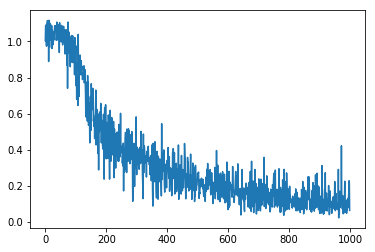

In [25]:
# 绘制图形
import matplotlib.pyplot as plt
markers = {'train': 'o', 'test': 's'}
x = np.arange(len(train_loss_list))
plt.plot(x, train_loss_list, label='train acc')

plt.show()

In [26]:
predict = network.predict(X_test)

accuracy_cnt = 0
for i in range(len(predict)):
    if np.argmax(predict[i]) == y_test[i]:
        accuracy_cnt += 1

print(accuracy_cnt/ len(y_test))

1.0
